## Exploratory Data Analysis

### 1. More feature engineering and selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

plt.style.use('ggplot')

In [2]:
feature_pickle = '/Users/ZhijingYe/Desktop/data/output/play_log_features_and_label.pkl'
df = pd.read_pickle(feature_pickle)
df.head()

,uid,song_popular,device,major_song_type,song_popularity_ratio,total_play_time,play_time_label,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week,label
0,100052111,0.107143,ar,0,0.107143,0.000000,0-100,0.000000,0.0,58.0,112,0,0,0,0,1
1,100107633,0.500000,ar,0,0.500000,3.033333,0-100,45.500000,0.0,4.0,0,0,4,0,0,1
2,100223381,0.000000,ar,0,0.000000,33.333333,0-100,125.000000,6.0,0.0,0,1,15,0,0,1
3,100581940,0.800000,ar,0,0.800000,17.200000,0-100,51.600000,1.0,17.0,0,0,0,20,0,1
4,100733657,0.434783,ar,0,0.434783,374.766667,100-400,195.530435,0.0,72.0,0,0,0,0,115,1


In [3]:
log_pickle = '/Users/ZhijingYe/Desktop/data/output/reduced_play_log.pkl'
df_play = pd.read_pickle(log_pickle)
df_play.head()

,uid,device,song_type,play_time,song_length,label,date,song_id_new,singer_popularity_rank
0,168308107,ar,0,296.0,296,0,20170410,816,183
1,168112765,ar,0,272.0,0,0,20170410,13121,35
2,168274411,ar,0,24.0,156,0,20170410,140473,25366
3,168274411,ar,0,333.0,334,0,20170410,1171,431
4,168274411,ar,0,155.0,156,0,20170410,140473,25366


In [4]:
# For churn prediction, choose the logs before the cut-off date 20170422
df_play = df_play.loc[df_play.date < '20170422']

In [5]:
df_play.date.unique()

array(['20170410', '20170411', '20170401', '20170414', '20170418',
       '20170408', '20170404', '20170308', '20170415', '20170419',
       '20170409', '20170305', '20170405', '20170302', '20170402',
       '20170412', '20170403', '20170413', '20170331', '20170406',
       '20170416', '20170421', '20170307', '20170407', '20170417',
       '20170420', '20170309', '20170301', '20170304', '20170330',
       '20170306', '20170303', '20170339'], dtype=object)

In [6]:
df_play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17591556 entries, 0 to 25491685
Data columns (total 9 columns):
uid                       object
device                    object
song_type                 object
play_time                 float64
song_length               object
label                     object
date                      object
song_id_new               int64
singer_popularity_rank    int64
dtypes: float64(1), int64(2), object(6)
memory usage: 1.3+ GB


In [7]:
df_temp = df_play[['date','label']].groupby(['date']).count().rename(columns={'label':'log_count'})

In [8]:
df_temp.head()

,log_count
date,
20170301,655949
20170302,446743
20170303,338692
20170304,292540
20170305,272102


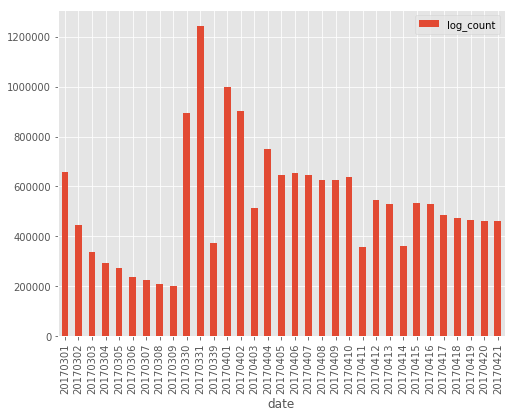

In [9]:
# Plot play_log_count vs date
plt.rcParams["figure.figsize"] = (8,6)
ax0 = df_temp.plot(kind='bar')
plt.show()

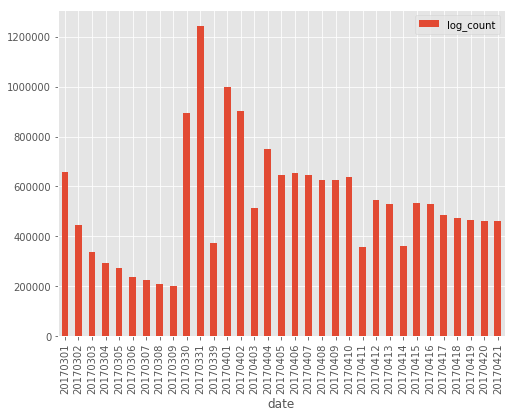

In [10]:
# Plot play_log_count vs date
plt.rcParams["figure.figsize"] = (8,6)
ax0 = df_temp.plot.bar()
plt.show()

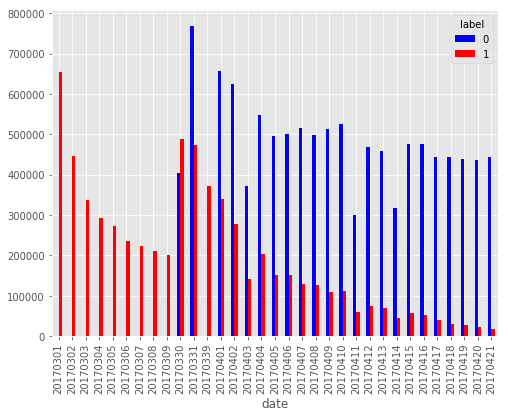

In [11]:
# Compare number of churns for different dates
plt.rcParams["figure.figsize"] = (8,6)
ax = df_play.groupby(['date','label']).size().unstack().fillna(0).plot.bar(color = ['b','r'])
plt.show()

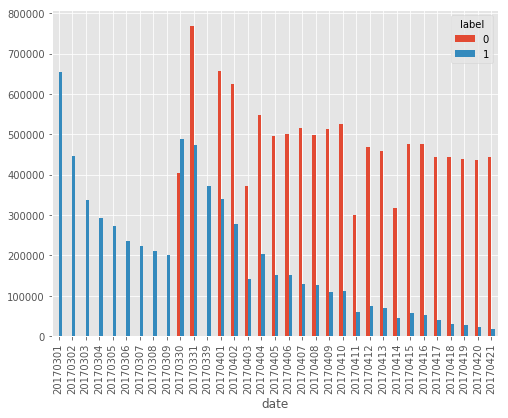

In [12]:
# Compare number of churns for different dates
plt.rcParams["figure.figsize"] = (8,6)
ax = df_play.groupby(['date','label']).size().unstack().fillna(0).plot(kind = 'bar')
plt.show()

It is clear that churn rate reduces as date approaches the cut-off date 2017/04/22, so last active date shoud be a very important feature. 

#### 1.1 Completion ratio: play_time / song_length 

In [13]:
df_play['song_length'] = pd.to_numeric(df_play.song_length, errors='coerce')

In [14]:
# There are missing song_length as '', which were not detected in the previous data cleansing step.
df_play.isnull().sum(axis = 0)

uid                           0
device                        0
song_type                     0
play_time                 13789
song_length                6994
label                         0
date                          0
song_id_new                   0
singer_popularity_rank        0
dtype: int64

In [15]:
df_play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17591556 entries, 0 to 25491685
Data columns (total 9 columns):
uid                       object
device                    object
song_type                 object
play_time                 float64
song_length               float64
label                     object
date                      object
song_id_new               int64
singer_popularity_rank    int64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.3+ GB


In [16]:
# Where there are missing song_length or play_time, set value to 0. 
df_play.loc[df_play.song_length.isnull(),'song_length'] = 0
df_play.loc[df_play.play_time.isnull(),'play_time'] = 0

In [17]:
df_play.isnull().sum(axis = 0)

uid                       0
device                    0
song_type                 0
play_time                 0
song_length               0
label                     0
date                      0
song_id_new               0
singer_popularity_rank    0
dtype: int64

In [18]:
# There are negative song_length logs, which should be taken are of.
df_play.loc[df_play.song_length < 0].groupby('song_length').count()

,uid,device,song_type,play_time,label,date,song_id_new,singer_popularity_rank
song_length,,,,,,,,
-2.147484e+09,4,4,4,4,4,4,4,4
-1.000000e+00,3868,3868,3868,3868,3868,3868,3868,3868


In [19]:
# Looks like -1 is a common value as negative song_length, replace -1 with 1 and replace -2.147484e+09 with 1
df_play.loc[df_play.song_length < 0,'song_length'] = 1

In [20]:
df_play.loc[df_play.song_length < 0]

,uid,device,song_type,play_time,song_length,label,date,song_id_new,singer_popularity_rank


In [21]:
df_play.loc[df_play.play_time < 0].groupby('play_time').count()

,uid,device,song_type,song_length,label,date,song_id_new,singer_popularity_rank
play_time,,,,,,,,
-2.147484e+09,4,4,4,4,4,4,4,4
-9.100129e-02,2,2,2,2,2,2,2,2
-3.391617e-02,1,1,1,1,1,1,1,1
-2.707971e-02,1,1,1,1,1,1,1,1
-2.178336e-02,1,1,1,1,1,1,1,1
-2.053176e-02,1,1,1,1,1,1,1,1
-1.847266e-02,2,2,2,2,2,2,2,2
-1.361866e-02,1,1,1,1,1,1,1,1
-1.197696e-02,1,1,1,1,1,1,1,1


In [22]:
# looks like -2.147484e+09 is also a common negative value for negative play_time. Replace with 1.
# All other play_time's absolute value seems normal. Replace with their abs.
df_play.loc[df_play.play_time == -2.147484e+09,'play_time'] = 1


In [23]:
df_play.loc[df_play.play_time < 0,'play_time'] = df_play.loc[df_play.play_time < 0,'play_time'].apply(lambda x: abs(x))

In [24]:
df_play.loc[df_play.play_time < 0].groupby('play_time').count()

,uid,device,song_type,song_length,label,date,song_id_new,singer_popularity_rank
play_time,,,,,,,,


### Need to modify the total_play_time and play_time_label in df.

In [25]:
df.total_play_time = list(df_play.groupby('uid')['play_time'].sum()/60)# change time unit to minutes
sum(df.total_play_time>100000)

/Users/ZhijingYe/anaconda/lib/python2.7/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.3.1 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


1258

In [26]:
bins = [-1,100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,float('inf')]
bin_names = ['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1k',\
             '1k-2k','2k-3k','3k-4k','4k-5k','5k-6k','6k-7k','7k-8k','8k-9k','9k-10k','10k+']
play_time_label = pd.cut(df.total_play_time,bins, labels = bin_names)
play_time_label.value_counts()

0-100      89334
100-200    17637
200-300     8952
1k-2k       6196
300-400     6006
400-500     4401
500-600     3230
10k+        3116
600-700     2715
700-800     2160
2k-3k       1910
800-900     1728
900-1k      1393
3k-4k        832
4k-5k        444
5k-6k        276
6k-7k        176
7k-8k        142
8k-9k        112
9k-10k        89
Name: total_play_time, dtype: int64

In [27]:
df.groupby(play_time_label).mean()['label']


total_play_time
0-100      0.824255
100-200    0.635085
200-300    0.548481
300-400    0.505994
400-500    0.476028
500-600    0.424768
600-700    0.368324
700-800    0.368519
800-900    0.354167
900-1k     0.290739
1k-2k      0.274209
2k-3k      0.250785
3k-4k      0.252404
4k-5k      0.288288
5k-6k      0.373188
6k-7k      0.380682
7k-8k      0.338028
8k-9k      0.544643
9k-10k     0.584270
10k+       0.813864
Name: label, dtype: float64

In [28]:
df['play_time_label'] = play_time_label
df.head()

,uid,song_popular,device,major_song_type,song_popularity_ratio,total_play_time,play_time_label,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week,label
0,100052111,0.107143,ar,0,0.107143,0.000000,0-100,0.000000,0.0,58.0,112,0,0,0,0,1
1,100107633,0.500000,ar,0,0.500000,3.033333,0-100,45.500000,0.0,4.0,0,0,4,0,0,1
2,100223381,0.000000,ar,0,0.000000,33.333333,0-100,125.000000,6.0,0.0,0,1,15,0,0,1
3,100581940,0.800000,ar,0,0.800000,17.200000,0-100,51.600000,1.0,17.0,0,0,0,20,0,1
4,100733657,0.434783,ar,0,0.434783,374.766667,300-400,195.530435,0.0,72.0,0,0,0,0,115,1


In [29]:
# completion ratio of each song playing activity
df_play['play_ratio'] = df_play.play_time / df_play.song_length
df_play['play_ratio'] = df_play['play_ratio'].apply(abs)
df_play.head()

,uid,device,song_type,play_time,song_length,label,date,song_id_new,singer_popularity_rank,play_ratio
0,168308107,ar,0,296.0,296.0,0,20170410,816,183,1.000000
1,168112765,ar,0,272.0,0.0,0,20170410,13121,35,inf
2,168274411,ar,0,24.0,156.0,0,20170410,140473,25366,0.153846
3,168274411,ar,0,333.0,334.0,0,20170410,1171,431,0.997006
4,168274411,ar,0,155.0,156.0,0,20170410,140473,25366,0.993590


In [30]:
# For the logs with 0 song length, set play_ratio to 1
df_play.loc[(df_play.song_length == 0) |(df_play.song_length == 0.0), 'play_ratio'] = 1
df_play.head()

,uid,device,song_type,play_time,song_length,label,date,song_id_new,singer_popularity_rank,play_ratio
0,168308107,ar,0,296.0,296.0,0,20170410,816,183,1.000000
1,168112765,ar,0,272.0,0.0,0,20170410,13121,35,1.000000
2,168274411,ar,0,24.0,156.0,0,20170410,140473,25366,0.153846
3,168274411,ar,0,333.0,334.0,0,20170410,1171,431,0.997006
4,168274411,ar,0,155.0,156.0,0,20170410,140473,25366,0.993590


In [31]:
df_play.play_ratio.describe()

count    1.759156e+07
mean     6.083923e+02
std      1.028469e+06
min      0.000000e+00
25%      4.149378e-02
50%      9.794239e-01
75%      1.000000e+00
max      2.147484e+09
Name: play_ratio, dtype: float64

In [32]:
df_play.loc[df_play.play_ratio > 1000000]

,uid,device,song_type,play_time,song_length,label,date,song_id_new,singer_popularity_rank,play_ratio
10685,168255513,ar,0,4.178748e+06,1.0,0,20170410,50581,273,4.178748e+06
1058966,168879620,ar,1,6.064927e+06,1.0,0,20170401,17410,839,6.064927e+06
1990823,154823377,ar,1,4.981195e+07,1.0,1,20170308,3505,18,4.981195e+07
2677593,168255513,ar,0,3.287750e+06,1.0,0,20170409,38145,273,3.287750e+06
2888236,154823377,ar,1,3.368380e+07,1.0,1,20170305,95375,348,3.368380e+07
2939737,154668112,ar,1,4.346241e+06,1.0,1,20170305,80666,200,4.346241e+06
2941847,154823377,ar,1,3.850312e+06,1.0,1,20170305,95375,348,3.850312e+06
2977081,154576691,ar,1,2.729140e+07,1.0,1,20170305,2729,13,2.729140e+07
2987673,154823377,ar,1,2.601476e+06,1.0,1,20170305,135184,3280,2.601476e+06
3236624,154668112,ar,1,1.576917e+06,1.0,1,20170302,50162,200,1.576917e+06


In [33]:
# It does not make much sense to have play_ratio >1
df_play.loc[df_play.play_ratio > 1,'play_ratio'] = 1

In [34]:
# For each user:
df['avg_complete_ratio'] = list(df_play.groupby('uid').mean()['play_ratio'])
df.head()

,uid,song_popular,device,major_song_type,song_popularity_ratio,total_play_time,play_time_label,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week,label,avg_complete_ratio
0,100052111,0.107143,ar,0,0.107143,0.000000,0-100,0.000000,0.0,58.0,112,0,0,0,0,1,0.035714
1,100107633,0.500000,ar,0,0.500000,3.033333,0-100,45.500000,0.0,4.0,0,0,4,0,0,1,0.222754
2,100223381,0.000000,ar,0,0.000000,33.333333,0-100,125.000000,6.0,0.0,0,1,15,0,0,1,0.603366
3,100581940,0.800000,ar,0,0.800000,17.200000,0-100,51.600000,1.0,17.0,0,0,0,20,0,1,0.449106
4,100733657,0.434783,ar,0,0.434783,374.766667,300-400,195.530435,0.0,72.0,0,0,0,0,115,1,0.851314


In [35]:
df['avg_complete_ratio'].describe()


count    150849.000000
mean          0.611683
std           0.259956
min           0.000000
25%           0.421012
50%           0.634310
75%           0.827989
max           1.000000
Name: avg_complete_ratio, dtype: float64

In [36]:
df.loc[df.avg_complete_ratio<0.1].label.mean(), df.loc[df.avg_complete_ratio>=0.1].label.mean()

(0.87910189982728848, 0.68571389335200983)

In [37]:
df.loc[df.avg_complete_ratio<=0.1].shape

(5216, 17)

#### 1.2 Days since last active

This is actually the first feature that needs to be figure out for this churn model.

The median or a certain quantile should be used for defining churns.

In [38]:
df_daily_play = df_play.groupby(['uid','date']).size().unstack().notnull()
df_daily_play.head()

date,20170301,20170302,20170303,20170304,20170305,20170306,20170307,20170308,20170309,20170330,...,20170412,20170413,20170414,20170415,20170416,20170417,20170418,20170419,20170420,20170421
uid,,,,,,,,,,,,,,,,,,,,,
100052111,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
100107633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100223381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100581940,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
100733657,True,True,True,False,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
days = len(df_daily_play.columns)

In [40]:
days

33

In [41]:
day_list = range(1, days+1)

In [42]:
active_day = df_daily_play.iloc[3,:]*day_list
active_day, active_day.index

(date
 20170301     0
 20170302     0
 20170303     0
 20170304     0
 20170305     0
 20170306     0
 20170307     0
 20170308     0
 20170309     0
 20170330    10
 20170331     0
 20170339     0
 20170401     0
 20170402     0
 20170403     0
 20170404     0
 20170405     0
 20170406     0
 20170407     0
 20170408     0
 20170409     0
 20170410     0
 20170411     0
 20170412     0
 20170413     0
 20170414     0
 20170415     0
 20170416     0
 20170417     0
 20170418     0
 20170419     0
 20170420     0
 20170421     0
 Name: 100581940, dtype: int64,
 Index([u'20170301', u'20170302', u'20170303', u'20170304', u'20170305',
        u'20170306', u'20170307', u'20170308', u'20170309', u'20170330',
        u'20170331', u'20170339', u'20170401', u'20170402', u'20170403',
        u'20170404', u'20170405', u'20170406', u'20170407', u'20170408',
        u'20170409', u'20170410', u'20170411', u'20170412', u'20170413',
        u'20170414', u'20170415', u'20170416', u'20170417', u'2017041

In [43]:
active_day.index[max(active_day)]

'20170331'

In [44]:
days - max(active_day)

23

In [45]:
df_daily_play.shape

(150849, 33)

In [46]:
df_daily_play['days_since_last_play'] = \
    [days - max(df_daily_play.iloc[i,:]*day_list) for i in xrange(df_daily_play.shape[0])]
df_daily_play.head()


date,20170301,20170302,20170303,20170304,20170305,20170306,20170307,20170308,20170309,20170330,...,20170413,20170414,20170415,20170416,20170417,20170418,20170419,20170420,20170421,days_since_last_play
uid,,,,,,,,,,,,,,,,,,,,,
100052111,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,2
100107633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,20
100223381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12
100581940,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,23
100733657,True,True,True,False,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,24


In [47]:
df_daily_play.shape

(150849, 34)

In [48]:
df_daily_play.loc[df_daily_play['days_since_last_play'] >=24, ['days_since_last_play']] = \
df_daily_play.loc[df_daily_play['days_since_last_play'] >=24, ['days_since_last_play']].apply(lambda x: x + 19)

In [49]:
df_daily_play['days_since_last_play'].value_counts()

23    17703
0     17201
21    13413
51    10624
43     7866
1      7083
22     6998
2      4841
20     4666
17     4363
19     4044
3      3705
4      3463
5      3431
44     3381
50     3323
6      2835
15     2403
45     2398
8      2386
12     2334
13     2317
49     2292
14     2291
11     2209
47     2110
48     2071
9      2044
18     2007
46     1912
7      1892
10     1243
Name: days_since_last_play, dtype: int64

In [50]:
df['days_since_last_play'] = list(df_daily_play['days_since_last_play'])
df.head()

,uid,song_popular,device,major_song_type,song_popularity_ratio,total_play_time,play_time_label,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week,label,avg_complete_ratio,days_since_last_play
0,100052111,0.107143,ar,0,0.107143,0.000000,0-100,0.000000,0.0,58.0,112,0,0,0,0,1,0.035714,2
1,100107633,0.500000,ar,0,0.500000,3.033333,0-100,45.500000,0.0,4.0,0,0,4,0,0,1,0.222754,20
2,100223381,0.000000,ar,0,0.000000,33.333333,0-100,125.000000,6.0,0.0,0,1,15,0,0,1,0.603366,12
3,100581940,0.800000,ar,0,0.800000,17.200000,0-100,51.600000,1.0,17.0,0,0,0,20,0,1,0.449106,23
4,100733657,0.434783,ar,0,0.434783,374.766667,300-400,195.530435,0.0,72.0,0,0,0,0,115,1,0.851314,43


In [51]:
df.days_since_last_play.describe()


count    150849.000000
mean         20.646985
std          16.940150
min           0.000000
25%           5.000000
50%          20.000000
75%          23.000000
max          51.000000
Name: days_since_last_play, dtype: float64

In [52]:
# average churn rate vs. median of the days_since_last_play

df.loc[df.days_since_last_play > 3].label.mean(),df.loc[df.days_since_last_play <= 3].label.mean()

(0.84915140782416387, 0.12887602802314957)

#### 1.3 active_days: days when a user had at least one activity

This might take off the influence of the outliers, who play huge amount of songs each day


In [53]:
df_daily_play.head()

date,20170301,20170302,20170303,20170304,20170305,20170306,20170307,20170308,20170309,20170330,...,20170413,20170414,20170415,20170416,20170417,20170418,20170419,20170420,20170421,days_since_last_play
uid,,,,,,,,,,,,,,,,,,,,,
100052111,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,2
100107633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,20
100223381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12
100581940,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,23
100733657,True,True,True,False,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,43


In [54]:
# if a user had any activity on each day
df_daily_active = df_play.groupby(['uid','date']).size().unstack().notnull()
df_daily_active.head()

date,20170301,20170302,20170303,20170304,20170305,20170306,20170307,20170308,20170309,20170330,...,20170412,20170413,20170414,20170415,20170416,20170417,20170418,20170419,20170420,20170421
uid,,,,,,,,,,,,,,,,,,,,,
100052111,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
100107633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100223381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100581940,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
100733657,True,True,True,False,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df['active_days']= list(df_daily_active.sum(axis=1))
df.head()

,uid,song_popular,device,major_song_type,song_popularity_ratio,total_play_time,play_time_label,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week,label,avg_complete_ratio,days_since_last_play,active_days
0,100052111,0.107143,ar,0,0.107143,0.000000,0-100,0.000000,0.0,58.0,112,0,0,0,0,1,0.035714,2,1
1,100107633,0.500000,ar,0,0.500000,3.033333,0-100,45.500000,0.0,4.0,0,0,4,0,0,1,0.222754,20,1
2,100223381,0.000000,ar,0,0.000000,33.333333,0-100,125.000000,6.0,0.0,0,1,15,0,0,1,0.603366,12,2
3,100581940,0.800000,ar,0,0.800000,17.200000,0-100,51.600000,1.0,17.0,0,0,0,20,0,1,0.449106,23,1
4,100733657,0.434783,ar,0,0.434783,374.766667,300-400,195.530435,0.0,72.0,0,0,0,0,115,1,0.851314,43,7


In [56]:
df_daily_active.iloc[0].sum()

1

In [57]:
df.groupby(['active_days','label']).size().unstack()

label,0,1
active_days,,
1,3943.0,51060.0
2,4075.0,17109.0
3,3910.0,10200.0
4,3664.0,7021.0
5,3316.0,5163.0
6,3065.0,3306.0
7,2805.0,2909.0
8,2516.0,2529.0
9,2219.0,2300.0


In [58]:
df.loc[df.active_days > 8].label.mean(),df.loc[df.active_days <= 8].label.mean()

(0.21230109654546953, 0.7843922553736048)

There is clear dependence of churn-rate on active_days

#### Feature engineering is done

In [59]:
df.shape

(150849, 19)

In [60]:
df.iloc[0,:].apply(type).value_counts()

<type 'numpy.int64'>      8
<type 'numpy.float64'>    7
<type 'str'>              4
Name: 0, dtype: int64

In [62]:
# Save new dataframe with all features
filename_pickle = '/Users/ZhijingYe/Desktop/data/output/play_full_features_and_label.pkl'
df.to_pickle(filename_pickle)

### 2. EDA
For categorical features, or numerical features with discrete values: Bar plot <br>
For numeric features with continues values: histogram


2.1 device vs. churn

In [63]:
df_device = df.groupby(['device','label']).size().unstack()
df_device

label,0,1
device,,
ar,38434,92672
ip,7968,11775


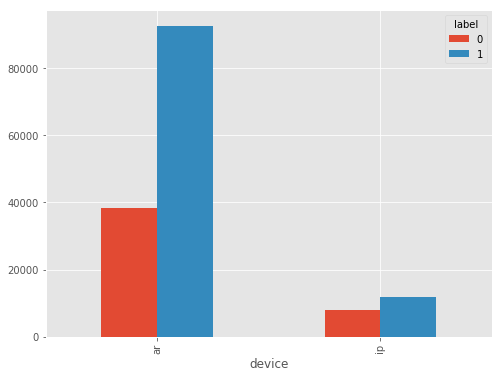

In [64]:
ax = df_device.plot.bar()
plt.show()

#### Users using iphone is less likely to churn compared to using android

2.2 Song_type vs. Churn


In [65]:
df_song_type = df.groupby(['major_song_type','label']).size().unstack()
df_song_type

label,0,1
major_song_type,,
0,42977,95295
1,3101,7946
2,316,1176
3,8,30


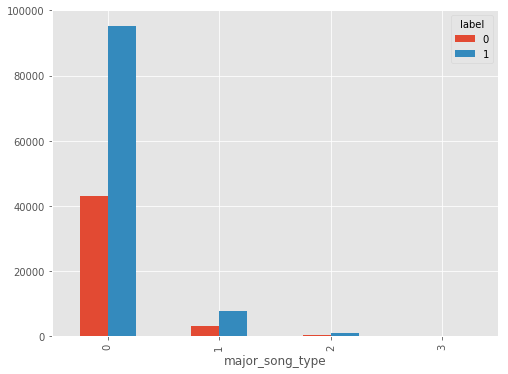

In [66]:
ax = df_song_type.plot.bar()
plt.show()

#### Not very clear dependence on the song_type

2.3 Active_days vs churn

In [67]:
df_active_days = df.groupby(['active_days','label']).size().unstack().fillna(0)
df_active_days

label,0,1
active_days,,
1,3943.0,51060.0
2,4075.0,17109.0
3,3910.0,10200.0
4,3664.0,7021.0
5,3316.0,5163.0
6,3065.0,3306.0
7,2805.0,2909.0
8,2516.0,2529.0
9,2219.0,2300.0


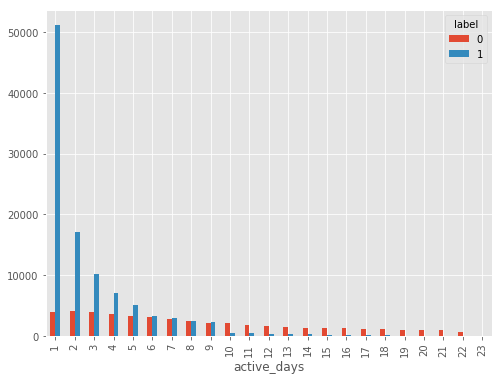

In [68]:
ax = df_active_days.plot.bar()
plt.rcParams["figure.figsize"] = (8,4)
plt.show()

#### Users with less than 3 activities have a very large probabilty to churn. 

2.4 days_since_last_play vs churn


In [69]:
df_days_since_last_play = df.groupby(['days_since_last_play','label']).size().unstack()
df_days_since_last_play

label,0,1
days_since_last_play,,
0,16103.0,1098.0
1,6038.0,1045.0
2,3793.0,1048.0
3,2665.0,1040.0
4,2183.0,1280.0
5,2211.0,1220.0
6,1673.0,1162.0
7,933.0,959.0
8,1104.0,1282.0


2.5 total_play_time


In [70]:
df.loc[df['total_play_time'] <0]

,uid,song_popular,device,major_song_type,song_popularity_ratio,total_play_time,play_time_label,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week,label,avg_complete_ratio,days_since_last_play,active_days


In [71]:
df.total_play_time.describe()


count    1.508490e+05
mean     6.231734e+03
std      2.399999e+05
min      0.000000e+00
25%      1.365000e+01
50%      6.101667e+01
75%      2.637167e+02
max      3.579208e+07
Name: total_play_time, dtype: float64

In [72]:
df.groupby('label').mean()


,song_popular,song_popularity_ratio,total_play_time,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week,avg_complete_ratio,days_since_last_play,active_days
label,,,,,,,,,,,,,,
0,0.385156,0.385156,7462.859062,2111.171676,3.023361,168.855911,68.121654,66.500345,80.076333,25.297961,0.000000,0.616880,4.721025,8.299664
1,0.435893,0.435893,5684.790516,5172.754020,1.206870,42.987735,2.381591,5.727785,13.357550,12.799391,27.537737,0.609374,27.722309,2.769462


In [73]:
df_play_time = df.loc[:,['total_play_time','label']]


In [74]:
df_play_time.head()

,total_play_time,label
0,0.000000,1
1,3.033333,1
2,33.333333,1
3,17.200000,1
4,374.766667,1


In [75]:
# Reduce number of total_play_time bins. 
bins_play_time = [0,100,400,700,1000,7000,10000,float('inf')]

In [76]:
df_play_time['bins'] = list(pd.cut(df.total_play_time, bins=bins_play_time, 
       right=False, labels=None, retbins=False, precision=1, include_lowest=True))
df_play_time.bins = df_play_time.bins.fillna('[2000,inf)')
df_play_time.head()

,total_play_time,label,bins
0,0.000000,1,"[0.0, 100.0)"
1,3.033333,1,"[0.0, 100.0)"
2,33.333333,1,"[0.0, 100.0)"
3,17.200000,1,"[0.0, 100.0)"
4,374.766667,1,"[100.0, 400.0)"


In [77]:
df_play_time_bins = df_play_time.groupby(['bins','label']).size().unstack().fillna(0)
df_play_time_bins

label,0,1
bins,,
"[0.0, 100.0)",15696,73630
"[100.0, 400.0)",13449,19153
"[400.0, 700.0)",5879,4467
"[700.0, 1000.0)",3468,1814
"[1000.0, 7000.0)",7148,2686
"[7000.0, 10000.0)",182,161
"[10000.0, inf)",580,2536


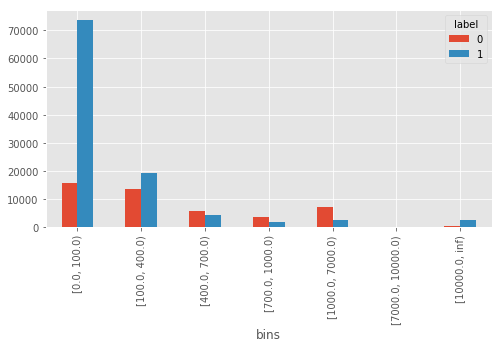

In [78]:
ax = df_play_time_bins.plot.bar()
plt.rcParams["figure.figsize"] = (6,4)
plt.show()

In [79]:
df['play_time_bins'] = df_play_time.bins
df.head()

,uid,song_popular,device,major_song_type,song_popularity_ratio,total_play_time,play_time_label,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week,label,avg_complete_ratio,days_since_last_play,active_days,play_time_bins
0,100052111,0.107143,ar,0,0.107143,0.000000,0-100,0.000000,0.0,58.0,112,0,0,0,0,1,0.035714,2,1,"[0.0, 100.0)"
1,100107633,0.500000,ar,0,0.500000,3.033333,0-100,45.500000,0.0,4.0,0,0,4,0,0,1,0.222754,20,1,"[0.0, 100.0)"
2,100223381,0.000000,ar,0,0.000000,33.333333,0-100,125.000000,6.0,0.0,0,1,15,0,0,1,0.603366,12,2,"[0.0, 100.0)"
3,100581940,0.800000,ar,0,0.800000,17.200000,0-100,51.600000,1.0,17.0,0,0,0,20,0,1,0.449106,23,1,"[0.0, 100.0)"
4,100733657,0.434783,ar,0,0.434783,374.766667,300-400,195.530435,0.0,72.0,0,0,0,0,115,1,0.851314,43,7,"[100.0, 400.0)"


In [80]:
df = df.drop('play_time_label',axis = 1)
df.head()

,uid,song_popular,device,major_song_type,song_popularity_ratio,total_play_time,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week,label,avg_complete_ratio,days_since_last_play,active_days,play_time_bins
0,100052111,0.107143,ar,0,0.107143,0.000000,0.000000,0.0,58.0,112,0,0,0,0,1,0.035714,2,1,"[0.0, 100.0)"
1,100107633,0.500000,ar,0,0.500000,3.033333,45.500000,0.0,4.0,0,0,4,0,0,1,0.222754,20,1,"[0.0, 100.0)"
2,100223381,0.000000,ar,0,0.000000,33.333333,125.000000,6.0,0.0,0,1,15,0,0,1,0.603366,12,2,"[0.0, 100.0)"
3,100581940,0.800000,ar,0,0.800000,17.200000,51.600000,1.0,17.0,0,0,0,20,0,1,0.449106,23,1,"[0.0, 100.0)"
4,100733657,0.434783,ar,0,0.434783,374.766667,195.530435,0.0,72.0,0,0,0,0,115,1,0.851314,43,7,"[100.0, 400.0)"


Churn rate is higher in when total play time < 200 mins

#### 2.6 Churn rate and counts of logs in different time window

In [81]:
df.columns


Index([u'uid', u'song_popular', u'device', u'major_song_type',
       u'song_popularity_ratio', u'total_play_time', u'avg_play_time',
       u'least_pop_count', u'most_popular_count', u'count_in_recent_1week',
       u'count_in_recent_2week', u'count_in_recent_3week',
       u'count_in_recent_4week', u'count_in_recent_8week', u'label',
       u'avg_complete_ratio', u'days_since_last_play', u'active_days',
       u'play_time_bins'],
      dtype='object')

In [82]:
import fnmatch

time_windows = fnmatch.filter(df.columns, '*recent*')
time_windows

['count_in_recent_1week',
 'count_in_recent_2week',
 'count_in_recent_3week',
 'count_in_recent_4week',
 'count_in_recent_8week']

In [83]:
df_time_windows = df.loc[:,time_windows]
df_time_windows.head()

,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week
0,112,0,0,0,0
1,0,0,4,0,0
2,0,1,15,0,0
3,0,0,0,20,0
4,0,0,0,0,115


In [84]:
df_time_windows.describe()

,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week
count,150849.000000,150849.000000,150849.000000,150849.000000,150849.000000
mean,22.603604,24.421766,33.880622,16.644022,19.066974
std,92.611360,105.093632,117.383359,45.782119,87.302607
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000
75%,3.000000,7.000000,22.000000,15.000000,0.000000
max,8820.000000,17666.000000,12754.000000,2631.000000,9028.000000


In [85]:
bins_window=[0, 10, 20, 50, 100, 1000, 5000, float('inf')]

In [86]:
df_time_windows1 = df.loc[:,['count_in_recent_1week','label']]
df_time_windows1['bins'] = list(pd.cut(df_time_windows1.count_in_recent_1week, bins=bins_window, 
       right=False, labels=None, retbins=False, precision=1, include_lowest=True))
df_time_windows1.head()

,count_in_recent_1week,label,bins
0,112,1,"[100.0, 1000.0)"
1,0,1,"[0.0, 10.0)"
2,0,1,"[0.0, 10.0)"
3,0,1,"[0.0, 10.0)"
4,0,1,"[0.0, 10.0)"


In [87]:
df_1_bins = df_time_windows1.groupby(['bins','label']).size().unstack().fillna(0)
df_1_bins

label,0,1
bins,,
"[0.0, 10.0)",19119.0,100102.0
"[10.0, 20.0)",4344.0,1335.0
"[20.0, 50.0)",7457.0,1714.0
"[50.0, 100.0)",6499.0,780.0
"[100.0, 1000.0)",8810.0,513.0
"[1000.0, 5000.0)",170.0,3.0
"[5000.0, inf)",3.0,0.0


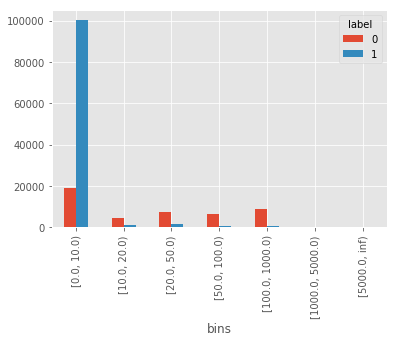

In [88]:
ax = df_1_bins.plot.bar()
plt.rcParams["figure.figsize"] = (10,4)
plt.show()

In [89]:
df_time_windows2 = df.loc[:,['count_in_recent_2week','label']]
df_time_windows2['bins'] = list(pd.cut(df_time_windows2.count_in_recent_2week, bins=bins_window, 
       right=False, labels=None, retbins=False, precision=1, include_lowest=True))
df_2_bins = df_time_windows2.groupby(['bins','label']).size().unstack().fillna(0)
df_2_bins

label,0,1
bins,,
"[0.0, 10.0)",19365,96411
"[10.0, 20.0)",4501,1896
"[20.0, 50.0)",7470,2679
"[50.0, 100.0)",6416,2123
"[100.0, 1000.0)",8488,1326
"[1000.0, 5000.0)",159,11
"[5000.0, inf)",3,1


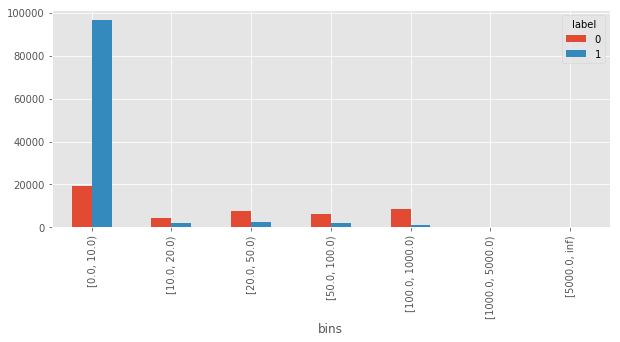

In [90]:
ax = df_2_bins.plot.bar()
plt.rcParams["figure.figsize"] = (10,4)
plt.show()

In [95]:
print(df)

               uid  song_popular device major_song_type  \
0        100052111      0.107143     ar               0   
1        100107633      0.500000     ar               0   
2        100223381      0.000000     ar               0   
3        100581940      0.800000     ar               0   
4       100733657       0.434783     ar               0   
5       100920280       0.000000     ar               1   
6        101122382      0.000000     ar               0   
7        101169218      0.263158     ar               0   
8        101372876      0.003049     ar               1   
9       101374971       0.025641     ar               2   
10      101537348       0.533333     ar               0   
11       101703605      0.545455     ar               0   
12       101907949      0.161765     ar               0   
13      101986413       0.461538     ar               0   
14       102014109      0.066531     ar               1   
15       10214468       0.340909     ar               0 

In [97]:
df_time_windows5 = df.loc[:,['count_in_recent_4week','label']]
df_time_windows5['bins'] = list(pd.cut(df_time_windows5.count_in_recent_4week, bins=bins_window, 
       right=False, labels=None, retbins=False, precision=1, include_lowest=True))
df_5_bins = df_time_windows5.groupby(['bins','label']).size().unstack().fillna(0)
df_5_bins

label,0,1
bins,,
"[0.0, 10.0)",26650,72375
"[10.0, 20.0)",5679,15090
"[20.0, 50.0)",7385,10873
"[50.0, 100.0)",3922,3714
"[100.0, 1000.0)",2752,2384
"[1000.0, 5000.0)",14,11


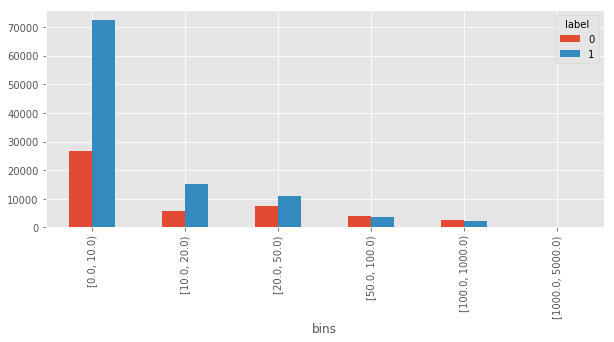

In [98]:
ax = df_5_bins.plot.bar()
plt.rcParams["figure.figsize"] = (10,4)
plt.show()

In [99]:
df_time_windows['label']=df.label
df_time_windows.loc[df_time_windows.label == 0].describe()

,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week,label
count,46402.000000,46402.000000,46402.000000,46402.000000,46402.0,46402.0
mean,68.121654,66.500345,80.076333,25.297961,0.0,0.0
std,154.817541,171.141568,180.052757,60.536938,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,2.000000,0.000000,0.0,0.0
50%,19.000000,18.000000,26.000000,5.000000,0.0,0.0
75%,76.000000,72.000000,88.000000,26.000000,0.0,0.0
max,8820.000000,17666.000000,12754.000000,2631.000000,0.0,0.0


In [100]:
df_time_windows.loc[df_time_windows.label == 1].describe()

,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week,label
count,104447.000000,104447.000000,104447.000000,104447.000000,104447.000000,104447.0
mean,2.381591,5.727785,13.357550,12.799391,27.537737,1.0
std,20.240754,42.465252,64.254649,36.756680,103.800644,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
75%,0.000000,0.000000,1.000000,13.000000,10.000000,1.0
max,1643.000000,7352.000000,4510.000000,2156.000000,9028.000000,1.0


### Save df

In [101]:
filename_pickle = '/Users/ZhijingYe/Desktop/data/output/modified_features_and_label.pkl'
df.to_pickle(filename_pickle)

In [102]:
df.shape

(150849, 19)

In [103]:
# test df is saved successfully
test_df = pd.read_pickle(filename_pickle)
test_df.shape

(150849, 19)